In [1]:
import tensorflow as tf
import numpy as np
import time
import pylab as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 4)

/home/bob/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# sess = tf.InteractiveSession()


In [4]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [5]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
# sess.run(tf.global_variables_initializer())

In [6]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [7]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1, 28, 28, 1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)



In [8]:
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [9]:
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [10]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [11]:
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [22]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
st = time.time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())
writer = tf.summary.FileWriter("conv_logs", graph=tf.get_default_graph())
for i in range(2500):
    batch = mnist.train.next_batch(50)
    if i % 100 == 0:
        train_accuracy = accuracy.eval(feed_dict={
      x: batch[0], y_: batch[1], keep_prob: 1.0},session=sess)
        print('step %d, training accuracy %g, time %g' % (i, train_accuracy, time.time()-st))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5},session=sess)

print('test accuracy %g' % accuracy.eval(feed_dict={
  x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0},session=sess))

step 0, training accuracy 0.1, time 0.427505
step 100, training accuracy 0.88, time 31.6837
step 200, training accuracy 0.94, time 63.2017
step 300, training accuracy 0.86, time 94.783
step 400, training accuracy 0.88, time 126.551
step 500, training accuracy 0.98, time 158.17
step 600, training accuracy 0.94, time 189.778
step 700, training accuracy 0.98, time 221.409
step 800, training accuracy 0.96, time 253.013
step 900, training accuracy 0.98, time 284.628
step 1000, training accuracy 1, time 316.184
step 1100, training accuracy 0.96, time 347.761
step 1200, training accuracy 0.96, time 379.401
step 1300, training accuracy 0.86, time 411.105
step 1400, training accuracy 0.96, time 442.842
step 1500, training accuracy 0.98, time 474.775
step 1600, training accuracy 0.96, time 506.772
step 1700, training accuracy 1, time 538.525
step 1800, training accuracy 1, time 570.458
step 1900, training accuracy 0.92, time 602.339
step 2000, training accuracy 0.98, time 634.199
step 2100, trai

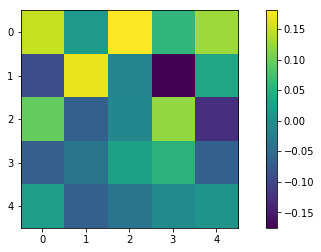

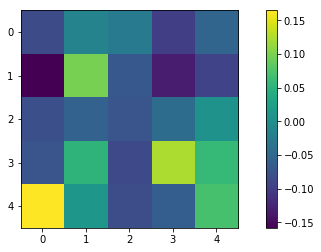

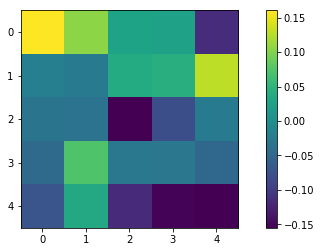

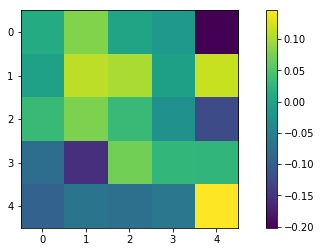

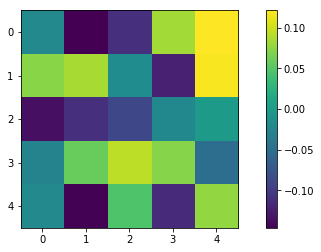

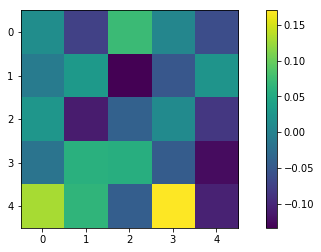

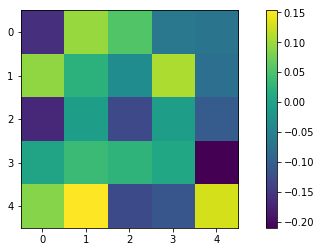

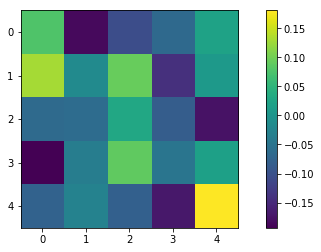

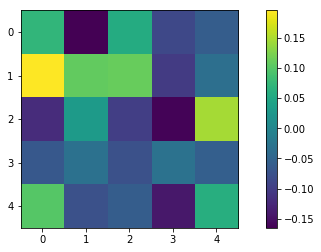

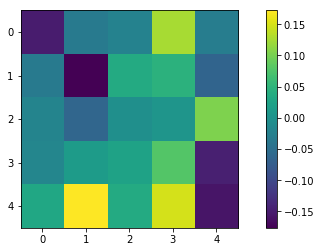

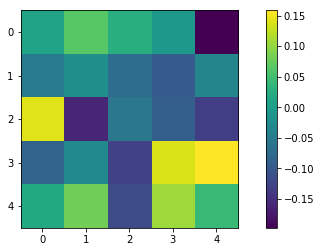

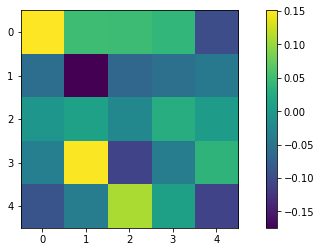

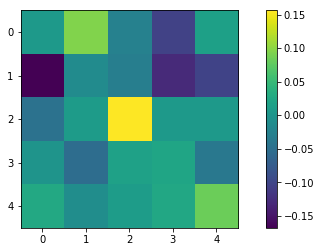

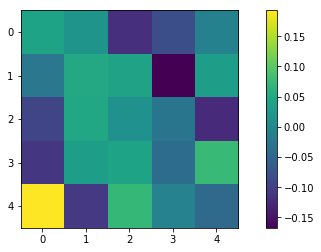

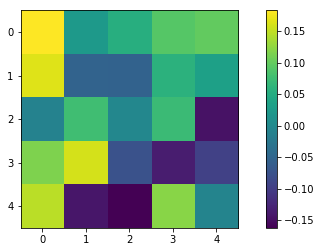

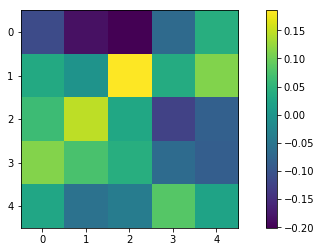

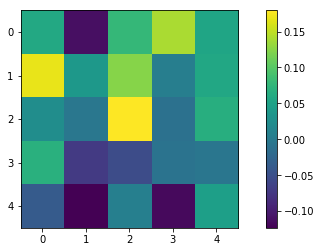

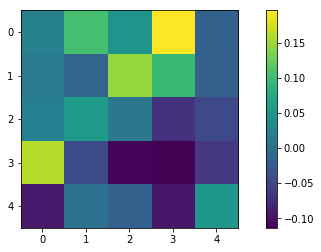

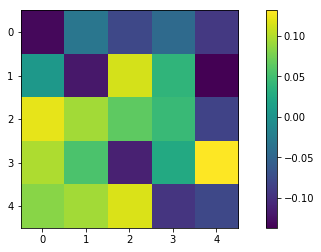

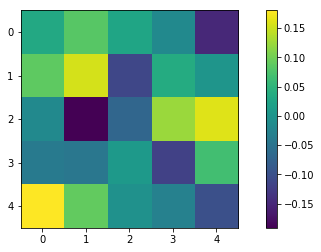

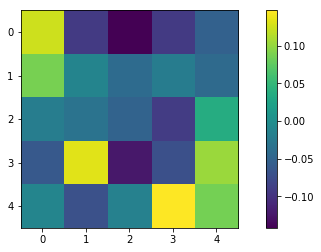

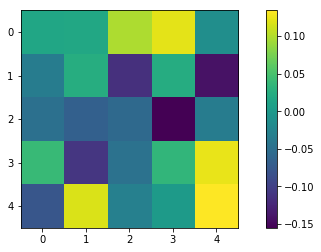

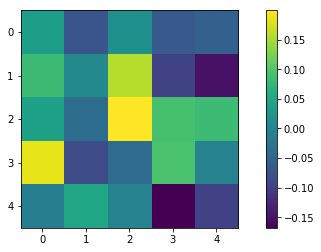

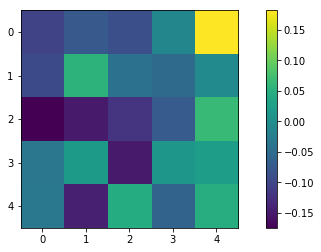

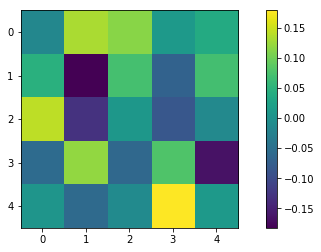

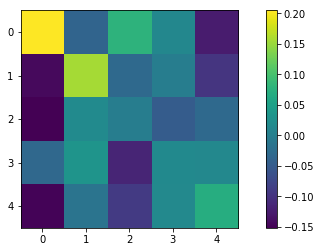

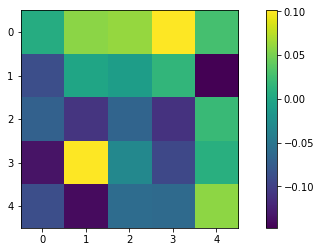

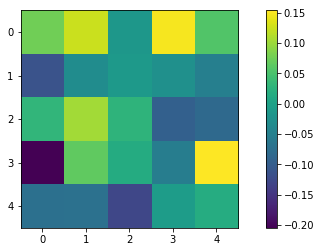

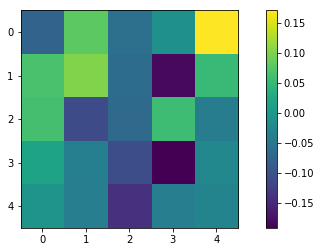

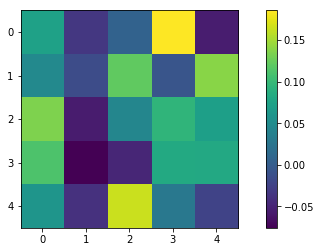

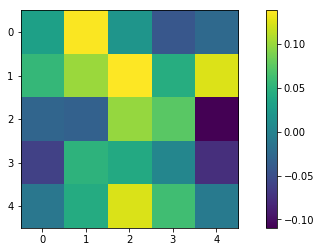

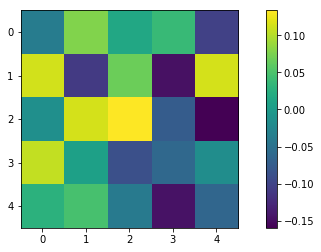

In [23]:
input_val = np.zeros(28**2)
# input_val[40] = 1

k1 = sess.run(W_conv1,feed_dict={x:input_val[np.newaxis,:], keep_prob:1.0})
for slicer in range(32):
    plt.imshow(k1[:,:,0,slicer])
    plt.colorbar()
    plt.show()

In [14]:
gr = tf.get_default_graph()

In [15]:
tf.global_variables()

[<tf.Variable 'Variable:0' shape=(784, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(10,) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(5, 5, 1, 32) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(5, 5, 32, 64) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'Variable_6:0' shape=(3136, 1024) dtype=float32_ref>,
 <tf.Variable 'Variable_7:0' shape=(1024,) dtype=float32_ref>,
 <tf.Variable 'Variable_8:0' shape=(1024, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_9:0' shape=(10,) dtype=float32_ref>,
 <tf.Variable 'beta1_power:0' shape=() dtype=float32_ref>,
 <tf.Variable 'beta2_power:0' shape=() dtype=float32_ref>,
 <tf.Variable 'Variable_2/Adam:0' shape=(5, 5, 1, 32) dtype=float32_ref>,
 <tf.Variable 'Variable_2/Adam_1:0' shape=(5, 5, 1, 32) dtype=float32_ref>,
 <tf.Variable 'Variable_3/Adam:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'Variable